### What book should we launch a marketing campaign on? if so, how much would the budget?

## PART 2 Data Science

Lets start with getting ready our dataset from our db

In [2]:
# Introduction
"""
# Data Science for EGW Books Collection
This notebook performs a deeper analysis given in the Data Analysis notebook
"""

# Setup
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database paths
DATABASE_PATH = 'dags/'
orders_db_path = f'{DATABASE_PATH}orders.db'


# Load data from orders database
conn_orders = sqlite3.connect(orders_db_path)
orders_df = pd.read_sql_query("SELECT * FROM orders", conn_orders)


orders_df



,id,username,title,image_url,quantity,cover_type,date,time,paid,promotion,price
0,1,Gabriel,The Adventist Home,https://media4.egwwritings.org/covers/128_r.jpg,30,hardcover,2024-07-28,11:47:48,yes,no,7.99
1,2,Gabriel,The Great Controversy,https://media4.egwwritings.org/covers/132_r.jpg,100,hardcover,2024-07-28,11:47:59,yes,no,7.99
2,3,Gabriel,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1000,hardcover,2024-07-28,11:48:27,yes,no,7.99
3,4,Gabriel,The Adventist Home,https://media4.egwwritings.org/covers/128_r.jpg,1,softcover,2024-07-28,11:49:01,yes,no,7.99
4,5,Gabriel,Steps to Christ,https://media4.egwwritings.org/covers/108_r.jpg,3,hardcover,2024-07-28,11:49:13,yes,no,7.99
...,...,...,...,...,...,...,...,...,...,...,...
60,104,Estefania,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,softcover,2024-08-04,16:42:25,yes,no,7.99
61,105,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,60,softcover,2024-08-04,16:42:52,yes,no,7.99
62,106,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,hardcover,2024-08-04,16:43:17,yes,no,7.99
63,107,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,hardcover,2024-08-04,16:43:29,yes,no,7.99


Now, we need to create a sunday_df to later on run ML algos on it:

- Lets get the day of the week
- Lets get the hour of the day

In [3]:
# Add the day of the week to the DataFrame
orders_df['date'] = pd.to_datetime(orders_df['date'])
orders_df['day_of_week'] = orders_df['date'].dt.day_name()

# Filter for "The Desire of Ages" and Sundays
sunday_df = orders_df[(orders_df['title'] == 'The Desire of Ages') & (orders_df['day_of_week'] == 'Sunday')]

# Display the result
sunday_df


,id,username,title,image_url,quantity,cover_type,date,time,paid,promotion,price,day_of_week
2,3,Gabriel,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1000,hardcover,2024-07-28,11:48:27,yes,no,7.99,Sunday
21,34,Estefania,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,5,softcover,2024-07-28,12:38:32,yes,no,7.99,Sunday
58,102,Luke,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,10,hardcover,2024-08-04,16:41:38,yes,no,7.99,Sunday
59,103,Yuli,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,80,hardcover,2024-08-04,16:42:00,yes,no,7.99,Sunday
60,104,Estefania,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,softcover,2024-08-04,16:42:25,yes,no,7.99,Sunday
61,105,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,60,softcover,2024-08-04,16:42:52,yes,no,7.99,Sunday
62,106,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,hardcover,2024-08-04,16:43:17,yes,no,7.99,Sunday
63,107,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,hardcover,2024-08-04,16:43:29,yes,no,7.99,Sunday


In [4]:
# Extract hour from time
sunday_df['hour'] = pd.to_datetime(sunday_df['time']).dt.hour

# Group by hour and sum the quantities
quantity_by_hour = sunday_df.groupby('hour')['quantity'].sum().reset_index()


C:\Users\gabri\AppData\Local\Temp\ipykernel_10236\1504233575.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunday_df['hour'] = pd.to_datetime(sunday_df['time']).dt.hour
C:\Users\gabri\AppData\Local\Temp\ipykernel_10236\1504233575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday_df['hour'] = pd.to_datetime(sunday_df['time']).dt.hour


We plotting the resulst to have a second view of what we discovered in the Data Analytics notebook. Remember we discovered that our best seller was The Desire Of Ages and people tend to buy it more and more books on Sundays' afternoon

C:\Users\gabri\AppData\Local\Temp\ipykernel_10236\927000754.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.01)


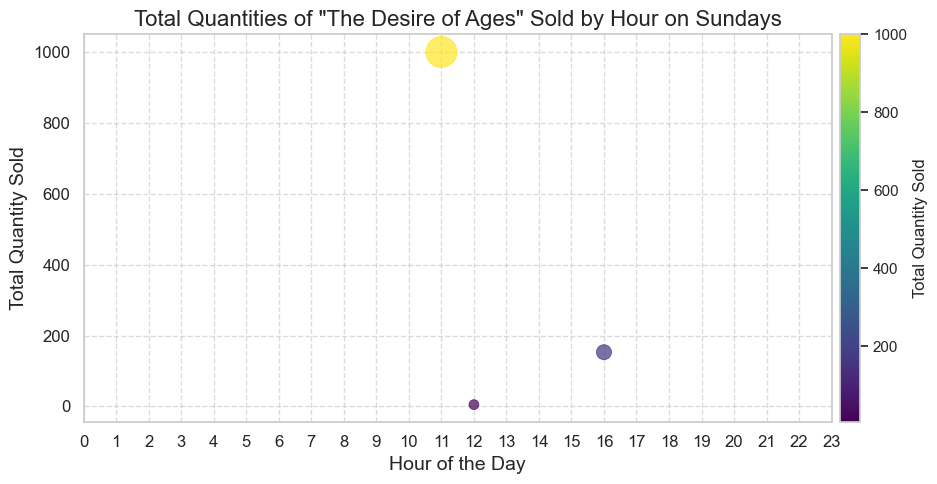

In [5]:
# Set up the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=quantity_by_hour, x='hour', y='quantity', 
                               size='quantity', hue='quantity', 
                               palette='viridis', sizes=(50, 500), 
                               legend=None, alpha=0.7, edgecolor=None)

# Add titles and labels
plt.title('Total Quantities of "The Desire of Ages" Sold by Hour on Sundays', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add a colorbar
norm = plt.Normalize(quantity_by_hour['quantity'].min(), quantity_by_hour['quantity'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.01)
cbar.set_label('Total Quantity Sold', fontsize=12)

plt.tight_layout()
plt.show()


I went to an internet search and I found all the data and formulas that is comming below: what i wanted to do is to study what are the average metrics from a Facebook ad, then create a syntethic dataframe from those metrics and run ML algos to predict how much revenue we could get from a Facebook ad campaign on our The Desire Of Ages book

I brought them to this notebook so you can have an idea of where does the data from the comming datasets come from

# Facebook ad data

## 1. Calculate Expected Impressions and Clicks
You have a budget of $299 and need to calculate the number of impressions and clicks this budget will generate.

### Cost Per 1,000 Impressions (CPM)
Facebook ads cost approximately $9.78 per 1,000 impressions.

Number of Impressions:

To find the number of impressions, use the formula:

Number of Impressions = (Total Budget / CPM) × 1000

Using your budget of $299:

Number of Impressions = (299 / 9.78) × 1000 ≈ 30,586 impressions

### Cost Per Click (CPC)
Facebook ads cost approximately $0.63 per click.

Number of Clicks:

To find the number of clicks, use the formula:

Number of Clicks = Total Budget / CPC

Using your budget of $299:

Number of Clicks = 299 / 0.63 ≈ 474 clicks

## 2. Estimate Sales and Revenue
Conversion Rate
The conversion rate is 10%.

### Number of Sales:

To find the number of sales, use the formula:

Number of Sales = Number of Clicks × Conversion Rate

Using a conversion rate of 10%:

Number of Sales = 474 × 0.10 ≈ 47 sales

Price of The Desire of Ages
The price is $7.99.

### Revenue from Sales:

To find the revenue, use the formula:

Revenue = Number of Sales × Price

Revenue = 47 × 7.99 ≈ $375.53

## 3. Calculate ROI
### Return on Investment (ROI)
The average ROI for Facebook Ads is 9.21, meaning you earn $9.21 for every $1 spent.

Expected Revenue:

To find the expected revenue, use the formula:

Expected Revenue = Total Budget × ROI

Using the ROI of 9.21:

Expected Revenue = 299 × 9.21 ≈ $2,752.79

## 4. Summarize
- Impressions Generated: Approximately 30,586

- Clicks Generated: Approximately 474

- Estimated Sales: Approximately 47

- Revenue from Sales: Approximately $375.53

- Expected ROI Revenue: Approximately $2,752.79


Now that we have all these formulas, we want to create a synthethic dataset of 100 entrys having:
- Budgets: from 100 to 500 dollars
- Cost Per Impression: from 8 - 10.5
- Cost Per Click: from 0.60 - 0.65
- Conversion Rate: from 0.09 - 0.13
- No of Impressions
- Clicks
- Sales
- Revenue

In [6]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Number of entries
num_entries = 100

# Budget from 100 to 500 dollars
budget = np.random.uniform(100, 500, num_entries)

CPM = np.random.uniform(8, 10.5, num_entries)
CPC = np.random.uniform(0.60, 0.65, num_entries)
conversion_rate = np.random.uniform(0.09, 0.13, num_entries)

# Calculate impressions, clicks, sales, and revenue
impressions = (budget / CPM) * 1000
clicks = impressions * (CPC / CPM)
sales = clicks * conversion_rate
price = 7.99
revenue = sales * price

# Create DataFrame
data = {
    'budget': budget,
    'CPM': CPM,
    'CPC': CPC,
    'conversion_rate': conversion_rate,
    'impressions': impressions,
    'clicks': clicks,
    'sales': sales,
    'revenue': revenue
}

synthetic_df = pd.DataFrame(data)

# Round columns to reasonable decimal places
synthetic_df['impressions'] = synthetic_df['impressions'].round()
synthetic_df['clicks'] = synthetic_df['clicks'].round()
synthetic_df['sales'] = synthetic_df['sales'].round()
synthetic_df['revenue'] = synthetic_df['revenue'].round(2)

# Display the first few rows of the DataFrame
synthetic_df


,budget,CPM,CPC,conversion_rate,impressions,clicks,sales,revenue
0,249.816048,8.078573,0.632102,0.092067,30923.0,2420.0,223.0,1779.88
1,480.285723,9.591026,0.604207,0.111254,50077.0,3155.0,351.0,2804.26
2,392.797577,8.785890,0.608081,0.111625,44708.0,3094.0,345.0,2759.74
3,339.463394,9.271427,0.644928,0.115497,36614.0,2547.0,294.0,2350.33
4,162.407456,10.268916,0.630321,0.119044,15815.0,971.0,116.0,923.36
...,...,...,...,...,...,...,...,...
95,297.518239,8.873024,0.626112,0.127230,33531.0,2366.0,301.0,2405.25
96,309.093132,9.814889,0.638500,0.124337,31492.0,2049.0,255.0,2035.28
97,271.016407,10.242776,0.610791,0.107160,26459.0,1578.0,169.0,1350.93
98,110.167651,10.217716,0.631145,0.120035,10782.0,666.0,80.0,638.75


- We picked 5 ML algos to run predictions
- We split the train - test data 
- We run the models and we run validation metrics to check which one performs better:
    - MSE
    - R2
- Conclusion: which model performs better
- T-Test Hypothesis
- Final Thoughts

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


# Features and target
X = synthetic_df[['budget', 'CPM', 'CPC', 'conversion_rate']]
y = synthetic_df['sales']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    new_campaign_data = pd.DataFrame({
        'budget': [299],
        'CPM': [9.78],
        'CPC': [0.63],
        'conversion_rate': [0.10]
    })
    
    predicted_sales = model.predict(new_campaign_data)[0]
    
    results.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r2,
        'Predicted Sales in $': predicted_sales
    })

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

,Model,Mean Squared Error,R-squared,Predicted Sales in $
0,Linear Regression,357.703643,0.968289,194.583951
1,Decision Tree Regressor,1435.200000,0.872768,210.000000
2,Random Forest Regressor,665.437665,0.941008,223.720000
3,Gradient Boosting Regressor,384.837868,0.965884,216.148561
4,Support Vector Regressor,8845.032508,0.215881,226.713691


### Conclusion

Best Model: Linear Regression

It has the lowest MSE and highest R-squared, indicating accurate and reliable predictions.


### T-Test Hypothesis 
If the t-statistic is positive and large, accompanied by a low p-value, it indicates that the predicted revenue is significantly higher than $299, suggesting a strong potential for profit. Conversely, a negative t-statistic would suggest that the predicted revenue is lower than $299. The p-value is crucial as it determines whether this difference is statistically significant. A low p-value typically leads to rejecting the null hypothesis, confirming that the predicted revenue is meaningfully different from $299, either higher or lower, depending on the t-statistic's sign.

In [12]:
import scipy.stats as stats

# Given values
budget = 299

# Extract predicted revenues from all models
predicted_revenues = results_df['Predicted Sales in $'].values

# Perform a one-sample t-test comparing the predicted revenues against the budget
t_stat, p_value = stats.ttest_1samp(predicted_revenues, budget)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The predicted revenue is significantly different from $299.")
    if t_stat > 0:
        print("The predicted revenue is significantly higher than $299.")
    else:
        print("The predicted revenue is significantly lower than $299.")
else:
    print("Fail to reject the null hypothesis: The predicted revenue is not significantly different from $299.")

T-statistic: -14.829842009177662
P-value: 0.00012037978599716966
Reject the null hypothesis: The predicted revenue is significantly different from $299.
The predicted revenue is significantly lower than $299.


### Final thoughts

Given that the most accurate model, Linear Regression, predicts that you'll generate $194.58 from an investment of $299, this indicates a potential loss of over $100. 
Since the p-value is so low, we reject the null hypothesis (H0) and conclude that the predicted revenue is significantly less than the budget of $299.

This suggests that proceeding with the campaign might not be financially viable as it stands.